# Goal of this exercise is to predict the price of a second hand car based on specifications /  available features / variables

## Importing Necessary Libraries

In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv("E:\\Trainings\\Complete Data Science Bootcamp - Udemy\\Practical Examples\\1.04. Real-life example.csv")

In [3]:
# Let's explore the top 5 rows of the df
raw_data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

## Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
raw_data.shape

(4345, 9)

In [5]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(percentiles=[0.25, 0.50, 0.75, 0.97, 0.98, 0.99], include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
97%            NaN   81420.000000    NaN   375.000000     5.200000   
98%            NaN  103705.960000    NaN   400.000000     5.500000   
99%            NaN  126902.160000    NaN   440.000000     6.200000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
97%            NaN          NaN  2016.000000      NaN  
98%            NaN          NaN  2016.000000      NaN  
99%            NaN          NaN  2016.000000      NaN  
max            NaN          NaN  2016.000000      NaN

#### Initial Observations from describe
A. Price:<BR>
1. Mean is 19418.74, Std is 25584.24, so the values are close enough, and not widely distributed, only few outliers exist <br>
2.Based on the above, we can also see that 97% of the data is in a reasonable range of mean, and we can even go till 99%, as difference between 99% and max is large, so we can consider data till 99% for analysis <br>
3. 300000 is an outlier and can be excluded from the analysis<br>
4. There are few Null values<br>

B. Mileage: <BR>
1. 99% of Mileage data is showing below or equal to 440.00, whereas, max value is 980, so again value > 440 can be considered as outliers <BR>
2. Mean and Std Dev looks fine <BR>

C. EngineV: <BR>
1. Mean and Std Dev looks fine<br>
2. There is an outlier value os 99.99 which is far away from 99% value of 6.2<br>
3. There are few Null values<br>

In [6]:
profile = raw_data.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="E:\\Trainings\\Complete Data Science Bootcamp - Udemy\\Practical Examples\\pre_profile_report.html")

#### Pandas Profiling Observations

Basic Observations:
1. There are 9 columns / variables in the dataset comprising of 4 categorical, 4 numerical and 1 boolean variable types <br>
2. There are 4345 rows / observations
3. There are 322 (0.8%) missing cells - randomly empty cells across rows and columns in the dataset
4. There are 73 (1.7%) duplicate rows
5. EngineV has 150 (3.5%) missing values 
6. Mileage has 185 (4.3%) zeros 
7. Model has a high cardinality: 312 distinct values 
8. Price has 172 (4.0%) missing values 

#### Important variables for price prediction:
1. Brand
2. Mileage: More driven, more cheaper
3. Engine Volume: Sports car have large engines compared to economy cars
4. Year: Older the car, lesser the price

In [7]:
raw_data.head()

Brand    Price       Body  Mileage  EngineV Engine_Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

### Determining the variables of interest

In [8]:
# For these several lessons, we will create the regression without 'Model'
# Certainly, when you work on the problem on your own, you could create a regression with 'Model'
data = raw_data.drop(['Model'],axis=1)

# Let's check the data without 'Model'
data.head()

Brand    Price       Body  Mileage  EngineV Engine_Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year  
0          yes  1991  
1          yes  1999  
2          yes  2003  
3          yes  2007  
4          yes  2011

#### Dealing with missing values

In [9]:
# Let's check the descriptives without 'Model'
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine_Type Registration         Year  
count         4345         4345  4345.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          2019         3947          NaN  
mean           NaN          NaN  2006.550058  
std            NaN          NaN     6.719097  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

## Dealing with Null Values

<b>Price and EngineV have few missing values as seen in describe above and below too</b>

In [10]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine_Type       0
Registration      0
Year              0
dtype: int64

#### Rule of thumb, if you are removing less that 5% observations, just remove all that have missing values

In [11]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_na = data.dropna(axis=0)

In [12]:
# Let's check the descriptives without the missing values
data_no_na.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine_Type Registration         Year  
count         4025         4025  4025.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1861         3654          NaN  
mean           NaN          NaN  2006.379627  
std            NaN          NaN     6.695595  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

## Exploring PDF (Probability Distribution Function)

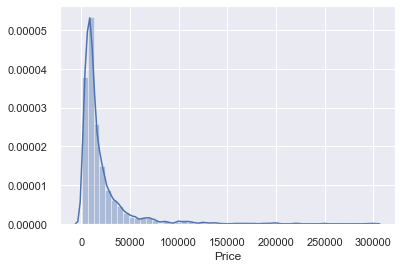

In [13]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_na['Price'])

## Dealing with Outliers

In [14]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_na['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_na[data_no_na['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine_Type Registration         Year  
count         3984         3984  3984.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1853         3613          NaN  
mean           NaN          NaN  2006.292922  
std            NaN          NaN     6.672745  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2002.750000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

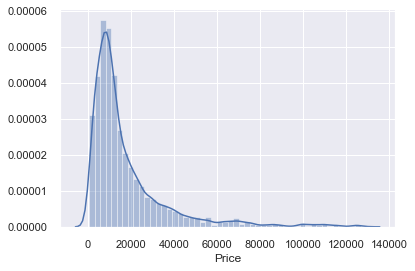

In [15]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1['Price'])

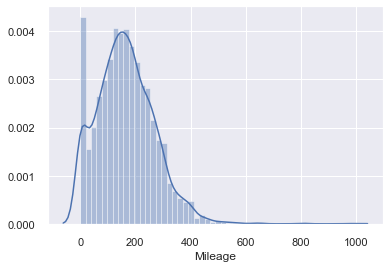

In [16]:
# We can treat the other numerical variables in a similar way
sns.distplot(data_1['Mileage'])

In [17]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3944    3944.000000   3944  3944.000000  3944.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           867            NaN   1511          NaN          NaN   
mean           NaN   17933.880822    NaN   161.484026     2.747612   
std            NaN   19008.212025    NaN    96.027108     4.980406   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    7000.000000    NaN    92.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21376.250000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000    99.990000   

       Engine_Type Registration         Year  
count         3944         3944  3944.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1825         3576          NaN  
mean           NaN          NaN  2006.389959  
std            NaN          NaN     6.595986  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

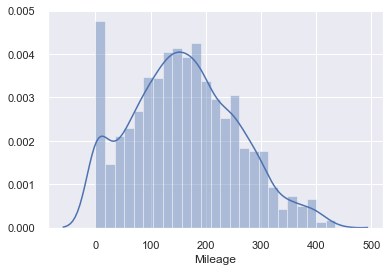

In [18]:
# This plot looks kind of normal, doesn't it?
sns.distplot(data_2['Mileage'])

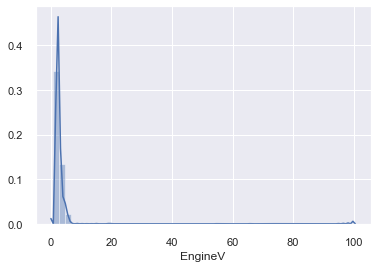

In [19]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.distplot(data_2['EngineV'])

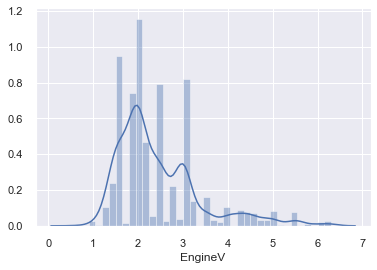

In [20]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<6.5]

# Following this graph, we realize we can actually treat EngineV as a categorical variable
# Even so, in this course we won't, but that's yet something else you may try on your own
sns.distplot(data_3['EngineV'])

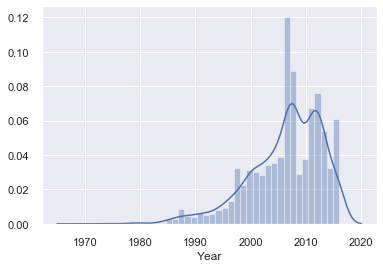

In [21]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.distplot(data_3['Year'])

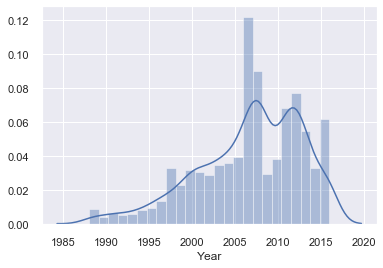

In [22]:
# I'll simply remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])

In [23]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [24]:
# Let's see what's left
data_cleaned.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine_Type Registration         Year  
count         3867         3867  3867.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1807         3505          NaN  
mean           NaN          NaN  2006.709853  
std            NaN          NaN     6.103870  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

In [25]:
profile = data_cleaned.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="E:\\Trainings\\Complete Data Science Bootcamp - Udemy\\Practical Examples\\post_profile_report.html")

## Checking the Regression / OLS assumptions

#### Regression / OLS Assumptions to be checked are:
1. Linearity: The first one is linearity. It is called a linear regression. The linear regression is the simplest one and assumes linearity. Each independent variable is multiplied by a coefficient and summed up to predict the value.
2. No Endogeneity: The second one is endogeneity of regressors. It refers to the prohibition of a link between the independent variables and the errors.
3. Normality and Homoscedasticity: The third OLS assumption is normality and homoscedasticity of the error term. Normality means the error term is normally distributed. The expected value of the error is 0, as we expect to have no errors on average. Homoscedasticity, in plain English, means constant variance.
4. No Autocorrelation: The fourth one is no autocorrelation. Mathematically, the covariance of any two error terms is 0. That’s the assumption that would usually stop you from using a linear regression in your analysis.
5. No Multicollinearity: Multicollinearity is observed when two or more variables have a high correlation between each other.

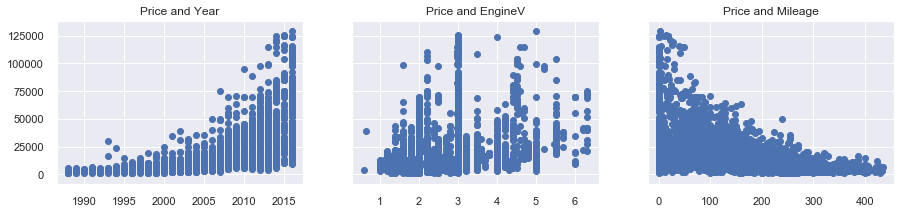

In [26]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

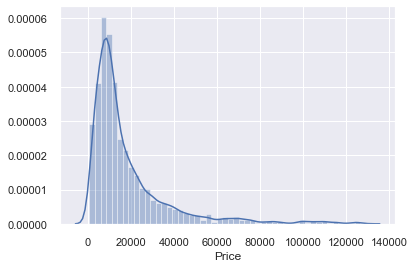

In [27]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

### 1. Linearity Assumption

In [28]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

Brand     Price       Body  Mileage  EngineV Engine_Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
3862     Volkswagen   11500.0        van      163      2.5      Diesel   
3863         Toyota   17900.0      sedan       35      1.6      Petrol   
3864  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
3865            BMW    6500.0      sedan        1      3.5      Petrol   
3866     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  log_price  
0             yes  1991   8.342840  
1             yes  1999   8.974618  
2             yes  2003   9.495519  
3             yes  2007  10.043249  
4             yes  2011   9.814656  
...           ...   ...        ...  
3862          yes  2008   9.350102  
3863          yes  2014   9.792556  
3864          yes  2014  11.736069  
3865          yes  1999   8.779557  
3866          yes  2013   9.510445  

[3867 rows x 9 columns]

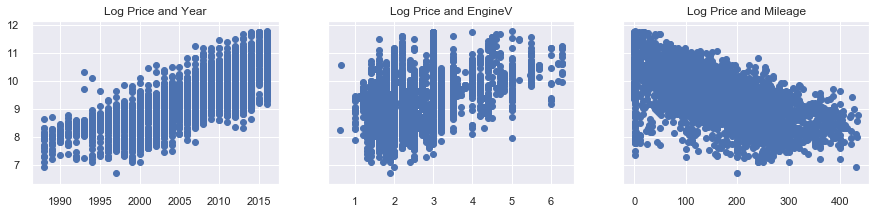

In [29]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [30]:
data_cleaned.head()

Brand    Price       Body  Mileage  EngineV Engine_Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year  log_price  
0          yes  1991   8.342840  
1          yes  1999   8.974618  
2          yes  2003   9.495519  
3          yes  2007  10.043249  
4          yes  2011   9.814656

In [31]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [32]:
data_cleaned.head()

Brand       Body  Mileage  EngineV Engine_Type Registration  Year  \
0            BMW      sedan      277      2.0      Petrol          yes  1991   
1  Mercedes-Benz        van      427      2.9      Diesel          yes  1999   
2  Mercedes-Benz      sedan      358      5.0         Gas          yes  2003   
3           Audi  crossover      240      4.2      Petrol          yes  2007   
4         Toyota  crossover      120      2.0      Petrol          yes  2011   

   log_price  
0   8.342840  
1   8.974618  
2   9.495519  
3  10.043249  
4   9.814656

### 2. No Endogeneity Assumption

Assumption not violated, so it's of no interest.

### 3. Normality and Homoscedasticity

Normality is assumed for a big sample following a central limit theoram
Zero Mean of the distribution of the errors is accomplished through the inclusion of intercept in the regression
After linearity, the homiscedsaticity assumption generally holds as seen in the 3 graphs above and the reason for this is, we already implemented LOG Transformation which is the most common fix for homoscedasticity.

### 4. No Autocorrelation

We dont need to put much effort into this, as the observations we are dealing with are not coming from time series data or panel data, they are simply a snapshot of current situation at a second hand car sales website.
Each row comes from a different customer who is willing to sell their car through the platform.
Logically, there is no reason for the observations to be dependent on each other, hence we are safe.

### 5. Multicollinearity

It's logical that Year and Mileage are going to be correlated, the newer the car, the lower it's mileage, therefore, we have a ground to expect some degree of multicollinearity in the data.

This needs to be done using statsmodels, as sklearn does not have any direct method to support this. 

One of the best ways to check for multicollinearity is through VIF (Variance Inflation Factor). VIF produces a measure which estimates how much larger the sqrt of the std err of an estimate is compared to a situation where the variable was completely uncorrelated with the other predictors.

In [33]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [34]:
# Let's explore the result
vif

VIF Features
0   3.791584  Mileage
1  10.354854     Year
2   7.662068  EngineV

VIF = 1: No Multicollinearity (this is also minimum valur of the measure)
VIF between 1 and 5: Perfectly OK
VIF > 10 is unacceptable (generally > 5 is cutoff but its not a norm, few even consider 10 as the cutoff, and we will not find data so accurate that it will have VIF < 5)

In [35]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create Dummy Variables

In [36]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [37]:
# Here's the result
data_with_dummies.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840          1                    0   
1      427      2.9   8.974618          0                    1   
2      358      5.0   9.495519          0                    1   
3      240      4.2  10.043249          0                    0   
4      120      2.0   9.814656          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine_Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine_Type_Other  Engine_Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

### Rearrange a bit

In [38]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine_Type_Gas',
       'Engine_Type_Other', 'Engine_Type_Petrol', 'Registration_yes'],
      dtype=object)

In [39]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine_Type_Gas',
       'Engine_Type_Other', 'Engine_Type_Petrol', 'Registration_yes']

In [40]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0          1                    0   
1   8.974618      427      2.9          0                    1   
2   9.495519      358      5.0          0                    1   
3  10.043249      240      4.2          0                    0   
4   9.814656      120      2.0          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine_Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine_Type_Other  Engine_Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

## Linear Regression Model

### Declare the inputs and the targets

In [41]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Scale / Standardize the data

In [42]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train / Test Split

In [44]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the Regression

In [45]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

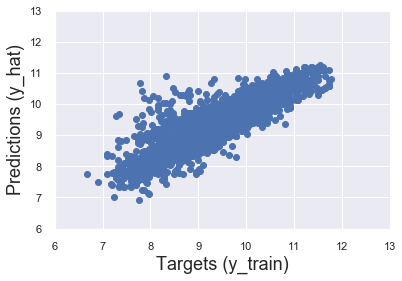

In [47]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

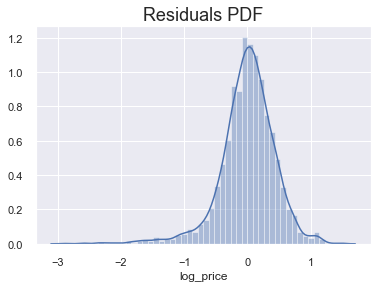

In [48]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [49]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)
# Below output suggests that our model explains 75% of the variability of the data

0.744996578792662

In [50]:
# Adjusted R2:
# There are different ways to solve this problem
# To make it as easy and interpretable as possible, we have preserved the original code
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [51]:
# Here's the result of Adjusted R2
adj_r2(x_train,y_train)

0.7435868037811093

#### Finding the weights and bias

In [52]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.415239458021297

In [53]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [54]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(data = inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features   Weights
0               Mileage -0.448713
1               EngineV  0.209035
2             Brand_BMW  0.014250
3   Brand_Mercedes-Benz  0.012882
4      Brand_Mitsubishi -0.140552
5         Brand_Renault -0.179909
6          Brand_Toyota -0.060550
7      Brand_Volkswagen -0.089924
8            Body_hatch -0.145469
9            Body_other -0.101444
10           Body_sedan -0.200630
11           Body_vagon -0.129887
12             Body_van -0.168597
13      Engine_Type_Gas -0.121490
14    Engine_Type_Other -0.033368
15   Engine_Type_Petrol -0.146909
16     Registration_yes  0.320473

**Interpretation from the table above**:

Weights / Coefficients Interpretation:

***A. Continuous Variables:***
1. A positive weight shows that as the feature increases in value, log_price and Price increase, e.g. Engine Volume, bigger the engine volume, higher the price
2. A negative weight shows that as the feature increases in value, log_price and Price decrease, e.g. Mileage, the more a car is driven the lower the price

***B. Dummy Variables:***
1. A positive weight shows that the respective category (Brand) is more expensive then the benchmark (Audi), e.g., BMW weight / coef is positive, so if the car is BMW it will be more expensive then Audi
2. A negative weight shows that the respective category (Brand) is less expensive then the benchmark (Audi), e.g., Mitsubishi weight / coef is negative, so if the car is Mitsubishi it will be less expensive then Audi

***C. Size of the weight***
1. This is a important parameter too.
2. Bigger the weight, bigger the impact, e.g., Mileage is the most prominent feature in this regression as it's more than twice as important than Engine volume

In [55]:
# Check the different categories that existed earlier in the 'Brand' variable
data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

As we can see above, Audi brand existed as one of the category, but it was not part of the weights table above, reason being,
when all other Dummies are 0, Audi is 1 so Audi is the benchmark

## Testing

In [56]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

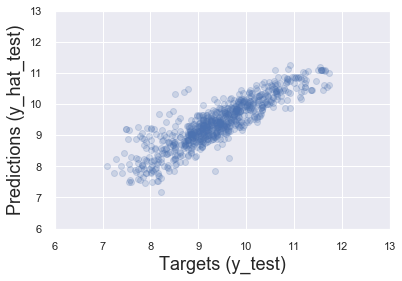

In [68]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

For higher prices, we have a higher concentration of values around 45 degree line therefore our model is very good at predicting higher prices, however, for lower prices, its looking much scatterred, conveying that we are not getting the prices right.

In [58]:
# Finally, let's manually check these predictions
# The initial outcome shows the logarithms and not actial prices
# To obtain the actual prices, we take the exponential (opposite of logarithm) of the log_price
# df_pf indidates dataframe performance
df_pf = pd.DataFrame(data=np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

Prediction
0  10685.501696
1   3499.255242
2   7553.285218
3   7463.963017
4  11353.490075

In [59]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf.head()

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

Prediction  Target
0  10685.501696     NaN
1   3499.255242  7900.0
2   7553.285218     NaN
3   7463.963017     NaN
4  11353.490075     NaN

In [61]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [62]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf.head()

Prediction  Target
0  10685.501696  2300.0
1   3499.255242  2800.0
2   7553.285218  2500.0
3   7463.963017  6400.0
4  11353.490075  9150.0

In [63]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [64]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

Prediction   Target      Residual  Difference%
0    10685.501696   2300.0  -8385.501696   364.587030
1     3499.255242   2800.0   -699.255242    24.973402
2     7553.285218   2500.0  -5053.285218   202.131409
3     7463.963017   6400.0  -1063.963017    16.624422
4    11353.490075   9150.0  -2203.490075    24.081859
..            ...      ...           ...          ...
769  29651.726363  29500.0   -151.726363     0.514327
770  10732.071179   9600.0  -1132.071179    11.792408
771  13922.446953  18300.0   4377.553047    23.921055
772  27487.751303  68500.0  41012.248697    59.871896
773  13491.163043  10800.0  -2691.163043    24.918176

[774 rows x 4 columns]

In [65]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

Prediction         Target      Residual  Difference%
count    774.000000     774.000000    774.000000   774.000000
mean   15946.760167   18165.817106   2219.056939    36.256693
std    13133.197604   19967.858908  10871.218143    55.066507
min     1320.562768    1200.000000 -29456.498331     0.062794
25%     7413.644234    6900.000000  -2044.191251    12.108022
50%    11568.168859   11600.000000    142.518577    23.467728
75%    20162.408805   20500.000000   3147.343497    39.563570
max    77403.055224  126000.000000  85106.162329   512.688080

Findings from desctiptive stats above:
1. The min difference in % is 0.06%, so the output was spot-on, however, the max difference in % is pretty off-mark
2. Looking at the percentiles, for most of the predictions, we got pretty close

In [66]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

Prediction    Target  Residual  Difference%
698    30480.85  30500.00     19.15         0.06
742    16960.31  16999.00     38.69         0.23
60     12469.21  12500.00     30.79         0.25
110    25614.14  25500.00   -114.14         0.45
367    42703.68  42500.00   -203.68         0.48
369     3084.69   3100.00     15.31         0.49
769    29651.73  29500.00   -151.73         0.51
272     9749.53   9800.00     50.47         0.52
714    23118.07  22999.00   -119.07         0.52
630     8734.58   8800.00     65.42         0.74
380     3473.79   3500.00     26.21         0.75
648    21174.10  21335.00    160.90         0.75
308     8967.74   8900.00    -67.74         0.76
665    17858.02  18000.00    141.98         0.79
379    17654.84  17800.00    145.16         0.82
719    11391.95  11500.00    108.05         0.94
102    28625.56  28900.00    274.44         0.95
94      7724.17   7800.00     75.83         0.97
561     6429.03   6500.00     70.97         1.09
242     7597.39   7500.00    -97.39         1.30
528    18555.09  18800.00    244.91         1.30
61      7396.87   7300.00    -96.87         1.33
19     16178.14  16400.00    221.86         1.35
280    12327.10  12499.00    171.90         1.38
311    51287.19  52055.25    768.06         1.48
723     6009.63   6100.00     90.37         1.48
49      4973.17   4900.00    -73.17         1.49
114    27716.14  27300.00   -416.14         1.52
636    28498.91  28950.00    451.09         1.56
612     2953.17   3000.00     46.83         1.56
47     26425.14  25999.00   -426.14         1.64
23     13111.91  12900.00   -211.91         1.64
31     12858.08  12650.00   -208.08         1.64
91     13421.16  13200.00   -221.16         1.68
329     7327.18   7200.00   -127.18         1.77
549     3816.33   3750.00    -66.33         1.77
252     9721.50   9900.00    178.50         1.80
387    44173.72  44999.00    825.28         1.83
267    40753.58  40000.00   -753.58         1.88
467    22262.80  22711.65    448.85         1.98
556    18231.44  18600.00    368.56         1.98
165     9596.94   9400.00   -196.94         2.10
259     6067.79   6200.00    132.21         2.13
601    35371.16  34600.00   -771.16         2.23
708    11967.39  11700.00   -267.39         2.29
593    17908.00  17500.00   -408.00         2.33
398     8707.13   8500.00   -207.13         2.44
526    29049.27  28350.00   -699.27         2.47
603    14513.46  14900.00    386.54         2.59
53     20453.89  21000.00    546.11         2.60
632    15383.35  14990.00   -393.35         2.62
533    24642.50  24000.00   -642.50         2.68
497    50099.92  51500.00   1400.08         2.72
212    16133.86  15700.00   -433.86         2.76
130    17489.92  18000.00    510.08         2.83
290     1894.40   1950.00     55.60         2.85
78     30810.25  29900.00   -910.25         3.04
642     8721.97   8999.00    277.03         3.08
437    18866.50  18300.00   -566.50         3.10
101     5958.63   6150.00    191.37         3.11
314     5811.74   6000.00    188.26         3.14
150     9800.43   9500.00   -300.43         3.16
565     7324.63   7100.00   -224.63         3.16
574    12583.52  13000.00    416.48         3.20
591    10115.13   9800.00   -315.13         3.22
172    11156.38  10800.00   -356.38         3.30
133     9279.28   9600.00    320.72         3.34
480    31369.37  32500.00   1130.63         3.48
87      2315.71   2400.00     84.29         3.51
11      5175.77   5000.00   -175.77         3.52
43     21611.83  22400.00    788.17         3.52
96      7976.26   7700.00   -276.26         3.59
406    24874.86  23999.00   -875.86         3.65
173    36516.35  37900.00   1383.65         3.65
540     4666.05   4500.00   -166.05         3.69
40     18672.68  18000.00   -672.68         3.74
340    14815.83  15400.00    584.17         3.79
239    10581.62  10999.00    417.38         3.79
109    12663.54  12200.00   -463.54         3.80
256     1825.44   1900.00     74.56         3.92
317    12247.90  12750.00    502.10 

1. From the above table, we can get how good our model has predicted the values
2. We can particularly look at values where there is larger difference
3. Looking at above data, it looks like there are not too many values far-off from the observed values
4. If we closely see, the observed values / target for these far-off values is very low
5. As out model us using brand, mileage, engine volume, registration and body type to predict the price of the used car, on average it's pretty decent in predicting the prices, barring few at the end
6. Important to note is that all the residuals for these outliers are negative, therefore, the predictions are higher than the targets - one of the reasons could be that we are missing some important factor pulling car prices lower could be model, which we have removed from this analysis, or the car was damaged in some way and we are missing the information in the dataset

How to improve model:
1. Use a different set of variables
2. Remove a bigger part of outliers
3. Use different kinds of transformations

ML requires us to re-visit model many times before we are truly happy with the result, this could take months or even years based on problem type we are trying to work on.